BINARIA 

- explicit sbilanciata per imbalanced learning
- uso mode per le prove

- density plot e skewness per le numeriche
- rilevazione outliers con boxplot
- sistemazione formato dati e binarie
- scatterplot se vedo correlazioni importanti 
- eliminazione valence e energy

- verificare gli id duplicati rimanenti e decidere se eliminare o meno (ci sono molte altre con nome uguale)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from scipy.stats import randint

In [2]:
def get_high_correlation_indexes(cm, threshold):
    high_indexes = np.where(np.abs(cm) > threshold)
    high_indexes = [(cm.index[x], cm.columns[y]) for x, y in zip(*high_indexes)
                                        if x != y and x < y]
    return high_indexes

def print_high_correlations(dataframe, threshold = 0.95):
    cm = dataframe.corr()
    hi = get_high_correlation_indexes(cm, threshold)
    for index in hi:
        print(f"{index[0]} x {index[1]}\n")

In [3]:
#proseguo sistemazione
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_final.csv')
df.shape

(89068, 36)

In [4]:
df.head()

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_artist,followers_artist,emotion
0,Grey,1,290479,0,52,5,"('Kölsch',)",album,1989,2017-09-22,...,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno,51.0,218818.0,nervous
1,Thrown,1,539229,0,45,5,"('Kiasmos',)",album,Kiasmos,2014-10-27,...,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno,47.0,231613.0,bored
2,Routine,1,264200,0,39,5,"('Joris Delacroix',)",album,Night Visions,2018-06-22,...,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno,44.0,100828.0,nervous
3,Confronted - Anfisa Letyago Stranger Remix,1,387413,0,0,6,"('Pan-Pot', 'Anfisa Letyago')",single,Confronted Remixes,2019-12-06,...,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno,38.0,148306.5,nervous
4,Jupiter Sunrise,1,248956,0,0,1,"('Kollektiv Turmstrasse',)",compilation,10 Years Diynamic,2016-09-16,...,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno,45.0,245839.0,nervous


popularity e anno di rilascio

In [5]:
# Visualizza il valore alla posizione 132 nella colonna album_release_date
print(df['album_release_date'].iloc[162])
df['album_release_date'] = pd.to_datetime(df['album_release_date']+ '-01-01')
print(df['album_release_date'].iloc[162])


2017-04-24


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_21608\2972339656.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['album_release_date'] = pd.to_datetime(df['album_release_date']+ '-01-01')


2017-04-24 01:00:00-01:00


In [6]:
# questa mi permette di sistemare e uniformre le date di rilascio e riempire laddove manca mese e giorno 

df['album_release_date'] = df['album_release_date'].apply(lambda x: x.replace(tzinfo=None))

In [7]:
#solo anno
df['album_release_date'] = pd.to_datetime(df['album_release_date']).dt.year

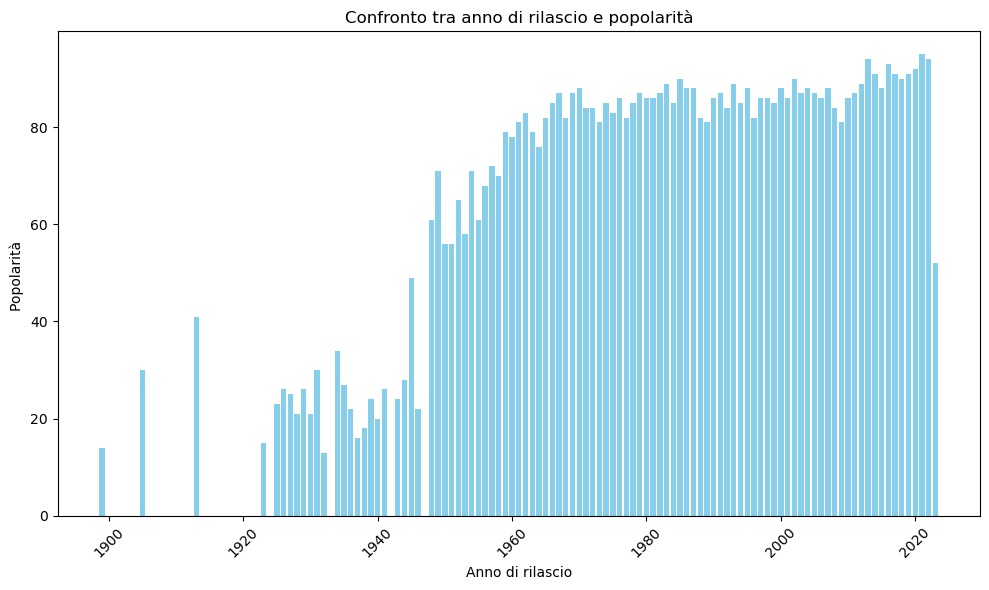

In [8]:
# Raggruppiamo i dati per anno di rilascio e calcoliamo la media della popolarità per ogni anno
# Calcola la media della popolarità raggruppata per 'album_release_date'
#grouped_data = df.groupby('album_release_date')['popularity'].mean().reset_index()

grouped_data = df.groupby('album_release_date')['popularity'].value_counts().reset_index(name='count')


# Ordiniamo i dati per anno di rilascio
grouped_data = grouped_data.sort_values(by='album_release_date')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['album_release_date'], grouped_data['popularity'], color='skyblue')
plt.xlabel('Anno di rilascio')
plt.ylabel('Popolarità ')
plt.title('Confronto tra anno di rilascio e popolarità')
plt.xticks(rotation=45)  # Rotazione delle etichette sull'asse x per una migliore leggibilità
plt.tight_layout()
plt.show()

In [9]:
print(df.columns)
print(len(df.columns))

Index(['name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre',
       'popularity_artist', 'followers_artist', 'emotion'],
      dtype='object')
36


In [10]:
#disc_number:The disc number (usually 1 unless the album consists of more than one disc).
#poco informativa, la tolgo

df['disc_number'].value_counts()

disc_number
1     87498
2      1221
3       178
4        50
5        30
6        25
7        23
8        14
9        14
10       10
11        4
14        1
Name: count, dtype: int64

In [11]:
#track_number:The number of the track. If an album has several discs, the track number is the number on the specified disc.
#poco informativa, la tolgo

df['track_number'].value_counts()

track_number
1      25608
2       8559
3       6913
4       5850
5       5124
       ...  
321        1
352        1
180        1
290        1
130        1
Name: count, Length: 296, dtype: int64

In [12]:
#time_signature:An estimated time signature. The time signature (meter) is a notational convention to specify how many beats 
#are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

#allora considero gli 1 come 4/4 e gli 0 come errati.

df['time_signature'].value_counts()

time_signature
4    79860
3     7618
5     1590
Name: count, dtype: int64

In [13]:
print(len(df.columns))

36


In [14]:
cat_var = ['name','explicit', 'disc_number', 'track_number', 'artists', 'album_type',
            'album_name', 'album_release_date', 'album_release_date_precision',
            'album_total_tracks', 'key', 'mode','genre','emotion', 'time_signature']

num_var = ['duration_ms', 'popularity','danceability', 'energy', 'loudness',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 
       'popularity_artist', 'followers_artist']

print(len(cat_var))
print(len(num_var))

15
21


In [15]:
for e in cat_var:
    print(df[e].value_counts())
    print()

name
Rockin' Around The Christmas Tree      48
Frosty The Snowman                     45
Little Saint Nick - 1991 Remix         41
Run Rudolph Run                        40
Santa Claus Is Coming To Town          38
                                       ..
MALA                                    1
white tee                               1
FUXK (feat. Ski Mask the Slump God)     1
I don't let go                          1
Dejalo                                  1
Name: count, Length: 72661, dtype: int64

explicit
0    81328
1     7740
Name: count, dtype: int64

disc_number
1     87498
2      1221
3       178
4        50
5        30
6        25
7        23
8        14
9        14
10       10
11        4
14        1
Name: count, dtype: int64

track_number
1      25608
2       8559
3       6913
4       5850
5       5124
       ...  
321        1
352        1
180        1
290        1
130        1
Name: count, Length: 296, dtype: int64

artists
('George Jones',)                             

In [16]:
#continuano ad esserci molti doppioni su tracce che differiscono per poca roba o album name

#df[df['name'] == 'Run Rudolph Run']

correlazione

In [17]:
df_num = df[(num_var)]
df_num.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'n_bars', 'popularity_artist',
       'followers_artist'],
      dtype='object')

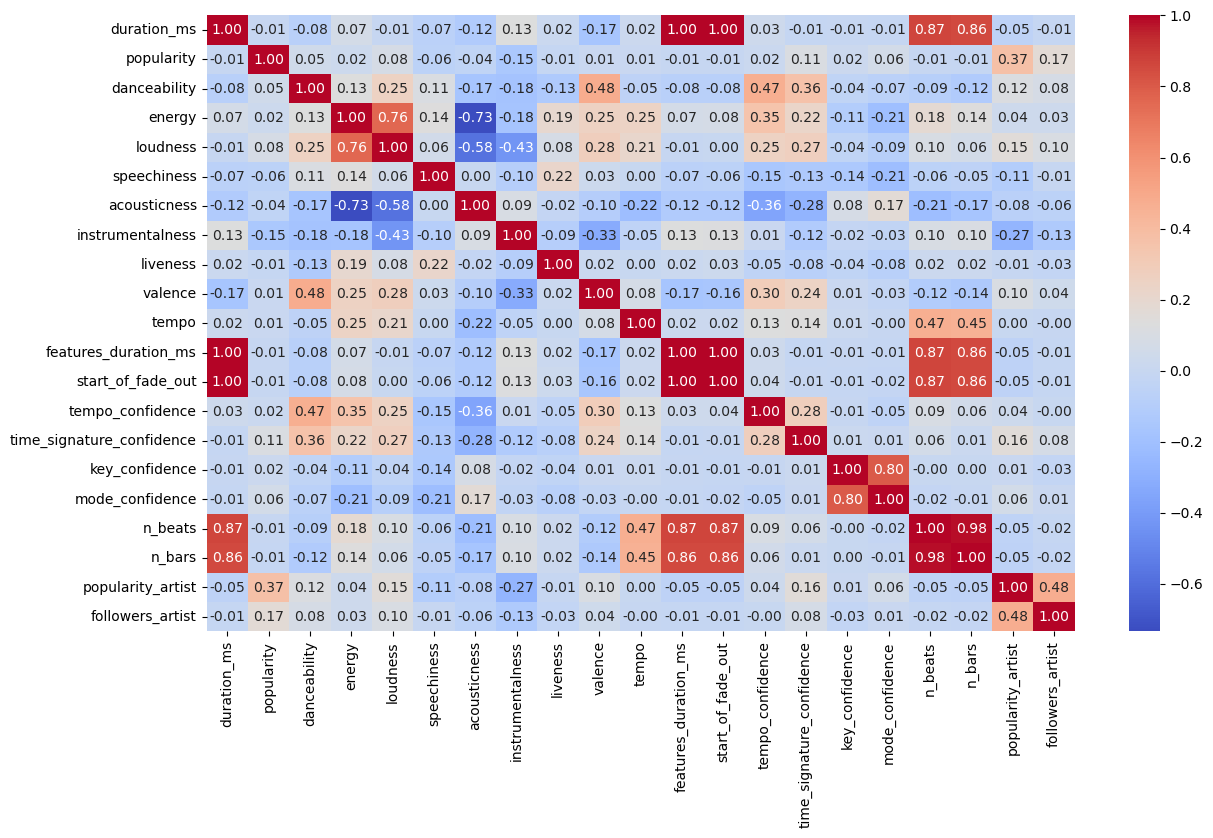

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calcola la matrice di correlazione
corr_matrix = df_num.corr()

# Crea il grafico della matrice di correlazione
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Matrice di correlazione')
plt.show()


In [18]:
#### eliminazione per alta correlazione
corr_matrix = df_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 o 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)] 
print(len(to_drop))
to_drop

3


['features_duration_ms', 'start_of_fade_out', 'n_bars']

In [19]:
print_high_correlations(df_num, threshold = 0.95)

duration_ms x features_duration_ms

duration_ms x start_of_fade_out

features_duration_ms x start_of_fade_out

n_beats x n_bars



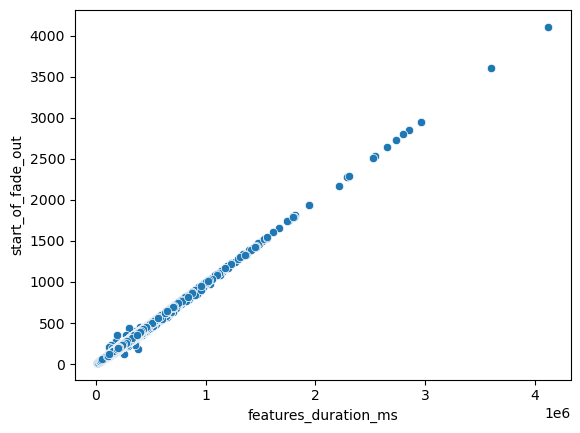

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona le colonne da plottare
x_column = 'features_duration_ms'  # Colonna sull'asse x
y_column = 'start_of_fade_out'  # Colonna sull'asse y

# Crea lo scatterplot con seaborn
sns.scatterplot(data=df, x=x_column, y=y_column)

# Aggiungi etichette agli assi
plt.xlabel(x_column)
plt.ylabel(y_column)

# Mostra il grafico
plt.show()

elimino per correlation:
- n_bars
- start_of_fade_out
- features_duration_ms 

In [21]:
df_num = df_num.drop(columns=["n_bars","start_of_fade_out","features_duration_ms"])
df = df.drop(columns=["n_bars","start_of_fade_out","features_duration_ms"])
df.shape


(89068, 33)

In [22]:
print_high_correlations(df_num, threshold = 0.90)

#### density plot e skewness

In [23]:
len(df_num.columns)

18

- The variables with skewness > 1  are highly positively skewed.

- The variables with skewness < -1 are highly negatively skewed.

- The variables with 0.5 < skewness < 1 are moderately positively skewed.

- The variables with -0.5 < skewness < -1 are moderately negatively skewed.

- The variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed 

In [24]:
df_num.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'popularity_artist',
       'followers_artist'],
      dtype='object')

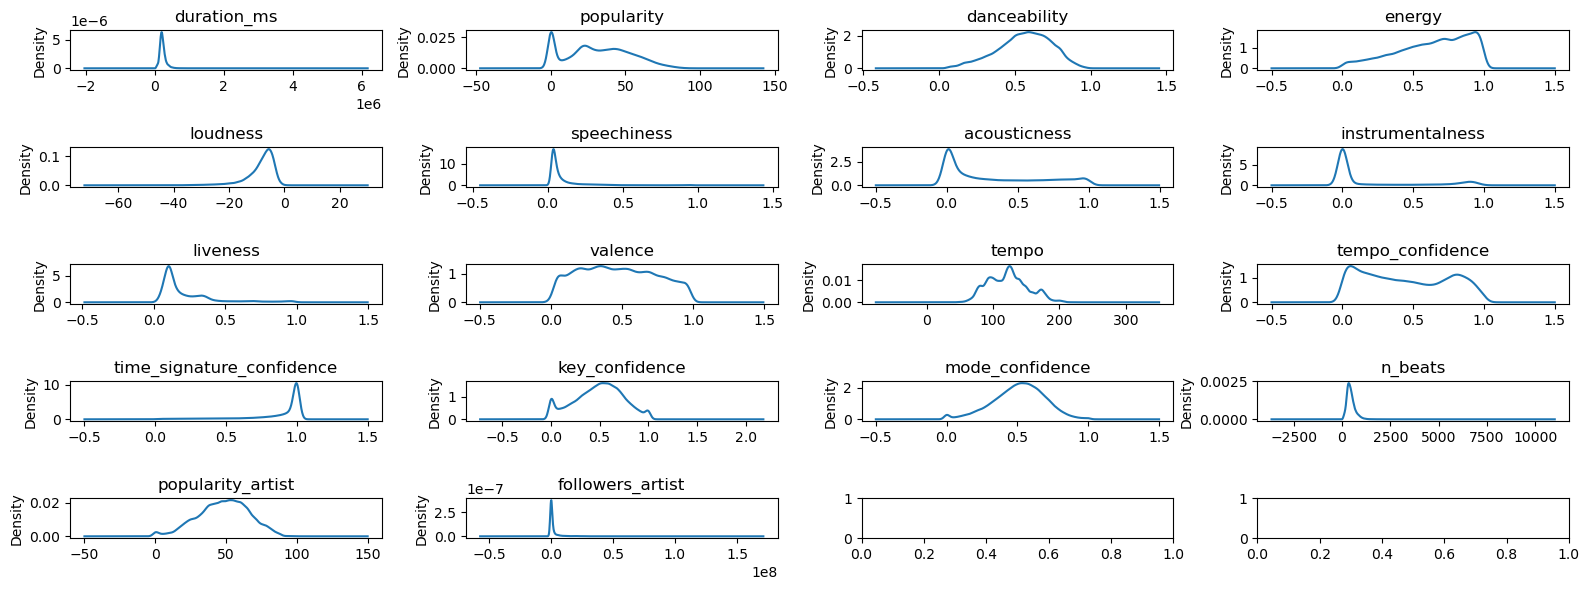

In [20]:
#VERIFICO ISTOGRAMMA DELLE NUMERICHE

#to_plot = ['duration_ms', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 
 #           'time_signature_confidence', 'n_beats', 'followers_artist']

#visualizzazione
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,6))

for i, var in enumerate(df_num.columns): #to_plot
    row = i // 4
    col = i % 4
    df_num[var].plot(kind="kde",ax=axes[row,col])
    axes[row,col].set_title(var)
    
plt.tight_layout()
plt.show()

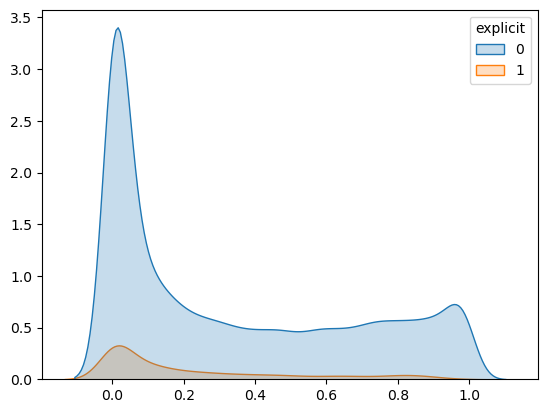

In [21]:
# Creazione del density plot  - mode explicit emotion 
sns.kdeplot(data=df, x='acousticness', hue='explicit', fill=True)
# Impostazione dei titoli degli assi
plt.xlabel('')
plt.ylabel('')

# Visualizzazione del plot
plt.show()

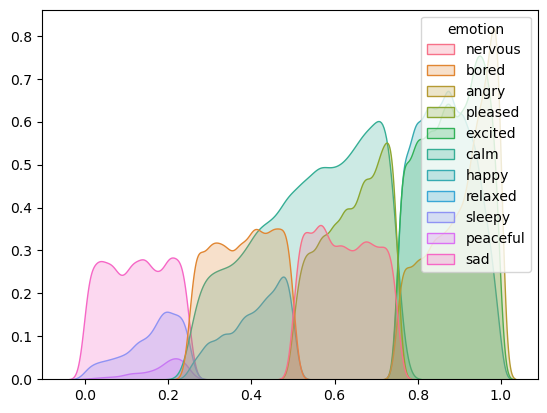

In [22]:
# Creazione del density plot
sns.kdeplot(data=df, x='energy', hue='emotion', fill=True)
# Impostazione dei titoli degli assi
plt.xlabel('')
plt.ylabel('')

# Visualizzazione del plot
plt.show()

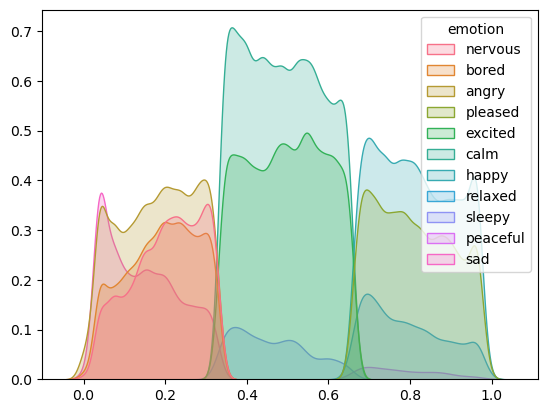

In [23]:
# Creazione del density plot
sns.kdeplot(data=df, x='valence', hue='emotion', fill=True)
# Impostazione dei titoli degli assi
plt.xlabel('')
plt.ylabel('')

# Visualizzazione del plot
plt.show()

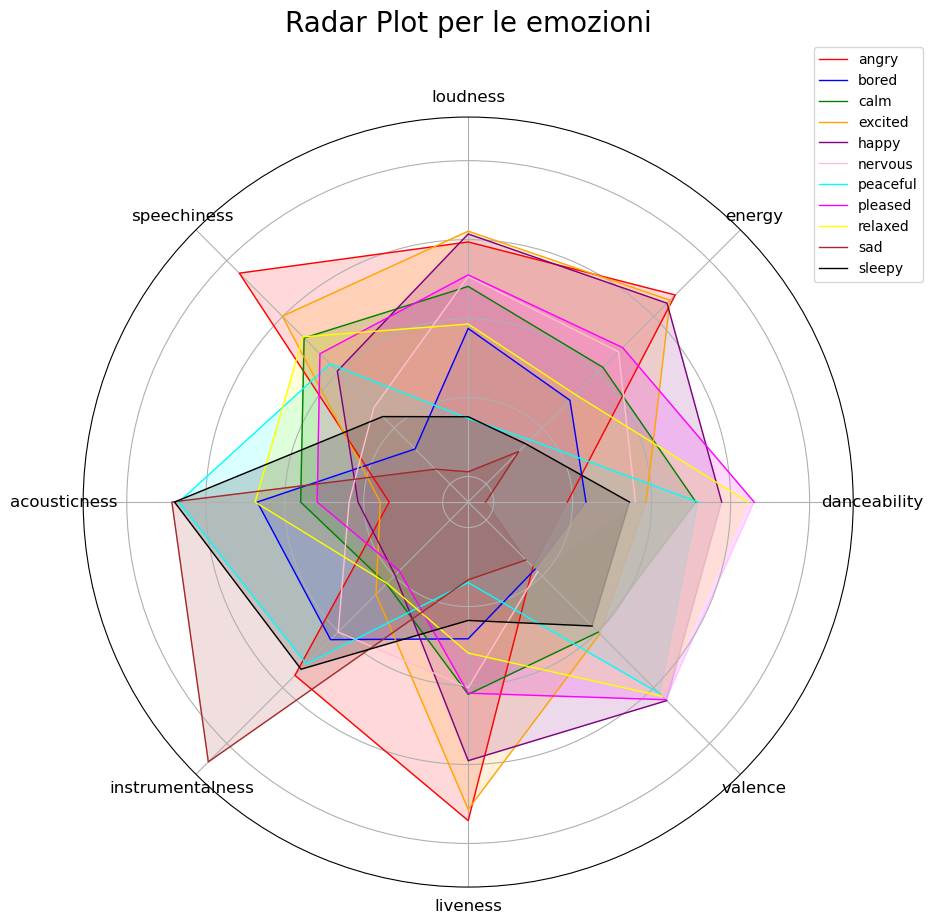

In [81]:
#PROVA RADAR PLOT, NON USARE
# 
# from sklearn.preprocessing import StandardScaler

# Normalizzazione dei punteggi delle caratteristiche audio
scaler = StandardScaler()
scaled_emotion_scores = scaler.fit_transform(list(emotion_scores.values()))

# Creazione del plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Aggiunta delle etichette
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(radar, fontsize=12)

# Aggiunta di una griglia circolare
ax.grid(True)

# Titolo
ax.set_title("Radar Plot per le emozioni", fontsize=20, y=1.1)

# Plot per ogni emozione
for idx, (emotion, scores) in enumerate(emotion_scores.items()):
    ax.plot(angles, scaled_emotion_scores[idx], color=colors[idx], linewidth=1, label=emotion)
    ax.fill(angles, scaled_emotion_scores[idx], color=colors[idx], alpha=0.15)

# Aggiunta della legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Visualizzazione del plot
plt.show()


In [25]:
from scipy.stats import skew
df_num.skew()

duration_ms                  5.228088
popularity                   0.157062
danceability                -0.368257
energy                      -0.562083
loudness                    -1.943456
speechiness                  4.541455
acousticness                 0.670017
instrumentalness             1.585038
liveness                     2.067877
valence                      0.124556
tempo                        0.287276
tempo_confidence             0.164078
time_signature_confidence   -2.256989
key_confidence              -0.170655
mode_confidence             -0.317681
n_beats                      3.776531
popularity_artist           -0.244593
followers_artist             6.586299
dtype: float64

In [26]:
to_transf =['duration_ms', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 
            'time_signature_confidence', 'n_beats']  #followers_artist


df[to_transf].skew()

duration_ms                  5.228088
loudness                    -1.943456
speechiness                  4.541455
instrumentalness             1.585038
liveness                     2.067877
time_signature_confidence   -2.256989
n_beats                      3.776531
dtype: float64

In [27]:
from scipy.stats import boxcox

# Assume df è il tuo DataFrame con le variabili
# to_transf è la lista delle colonne da trasformare

# Effettua la trasformazione Box-Cox per ogni variabile nella lista
for col in to_transf:
    # Assicurati che non ci siano valori negativi
    if (df[col] <= 0).any():
        # Shifta i valori per renderli tutti positivi
        df[col] += abs(df[col].min()) + 1

# Applica la trasformazione Box-Cox
for col in to_transf:
    df[col], _ = boxcox(df[col])

# Ora le variabili nel DataFrame sono trasformate usando Box-Cox


In [28]:
df[to_transf].skew()

duration_ms                  0.054047
loudness                    -0.222801
speechiness                  0.224760
instrumentalness             1.170345
liveness                     0.020098
time_signature_confidence   -0.921007
n_beats                      0.040969
dtype: float64

- BOXCOX vedi trasformazioni da applicare
- vedi laddove ci sono piu punte e analizzo o plotto

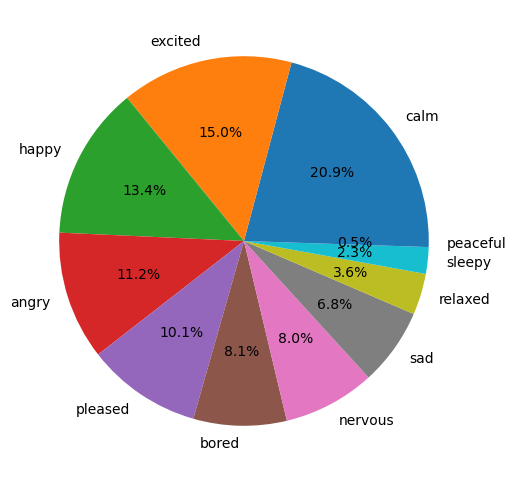

In [29]:
# Conteggio delle occorrenze delle categorie per la variabile 'emotion'
emotion_counts = df['emotion'].value_counts()

# Creazione del grafico a torta per la variabile 'emotion'
plt.figure(figsize=(8, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%')
#plt.title("Distribuzione delle emozioni")
plt.show()

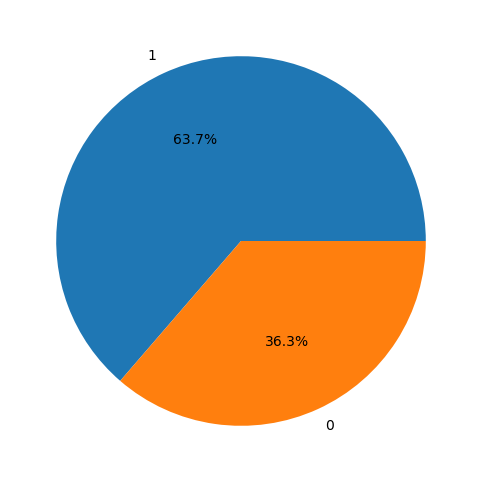

In [30]:
# MODE
counts_mode = df['mode'].value_counts()

# Creazione del grafico a torta per la variabile 'emotion'
plt.figure(figsize=(8, 6))
plt.pie(counts_mode, labels=counts_mode.index, autopct='%1.1f%%')
#plt.title("Distribuzione delle emozioni")
plt.show()

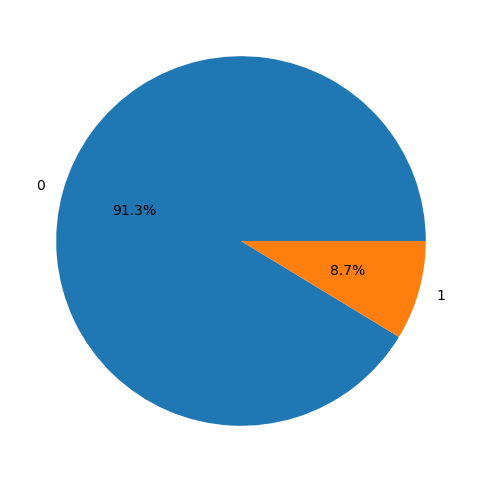

In [31]:
#EXPLICIT
emotion_counts = df['explicit'].value_counts()

# Creazione del grafico a torta per la variabile 'emotion'
plt.figure(figsize=(8, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%')
#plt.title("Distribuzione delle emozioni")
plt.show()


### visualizzazione distribuzione var continue

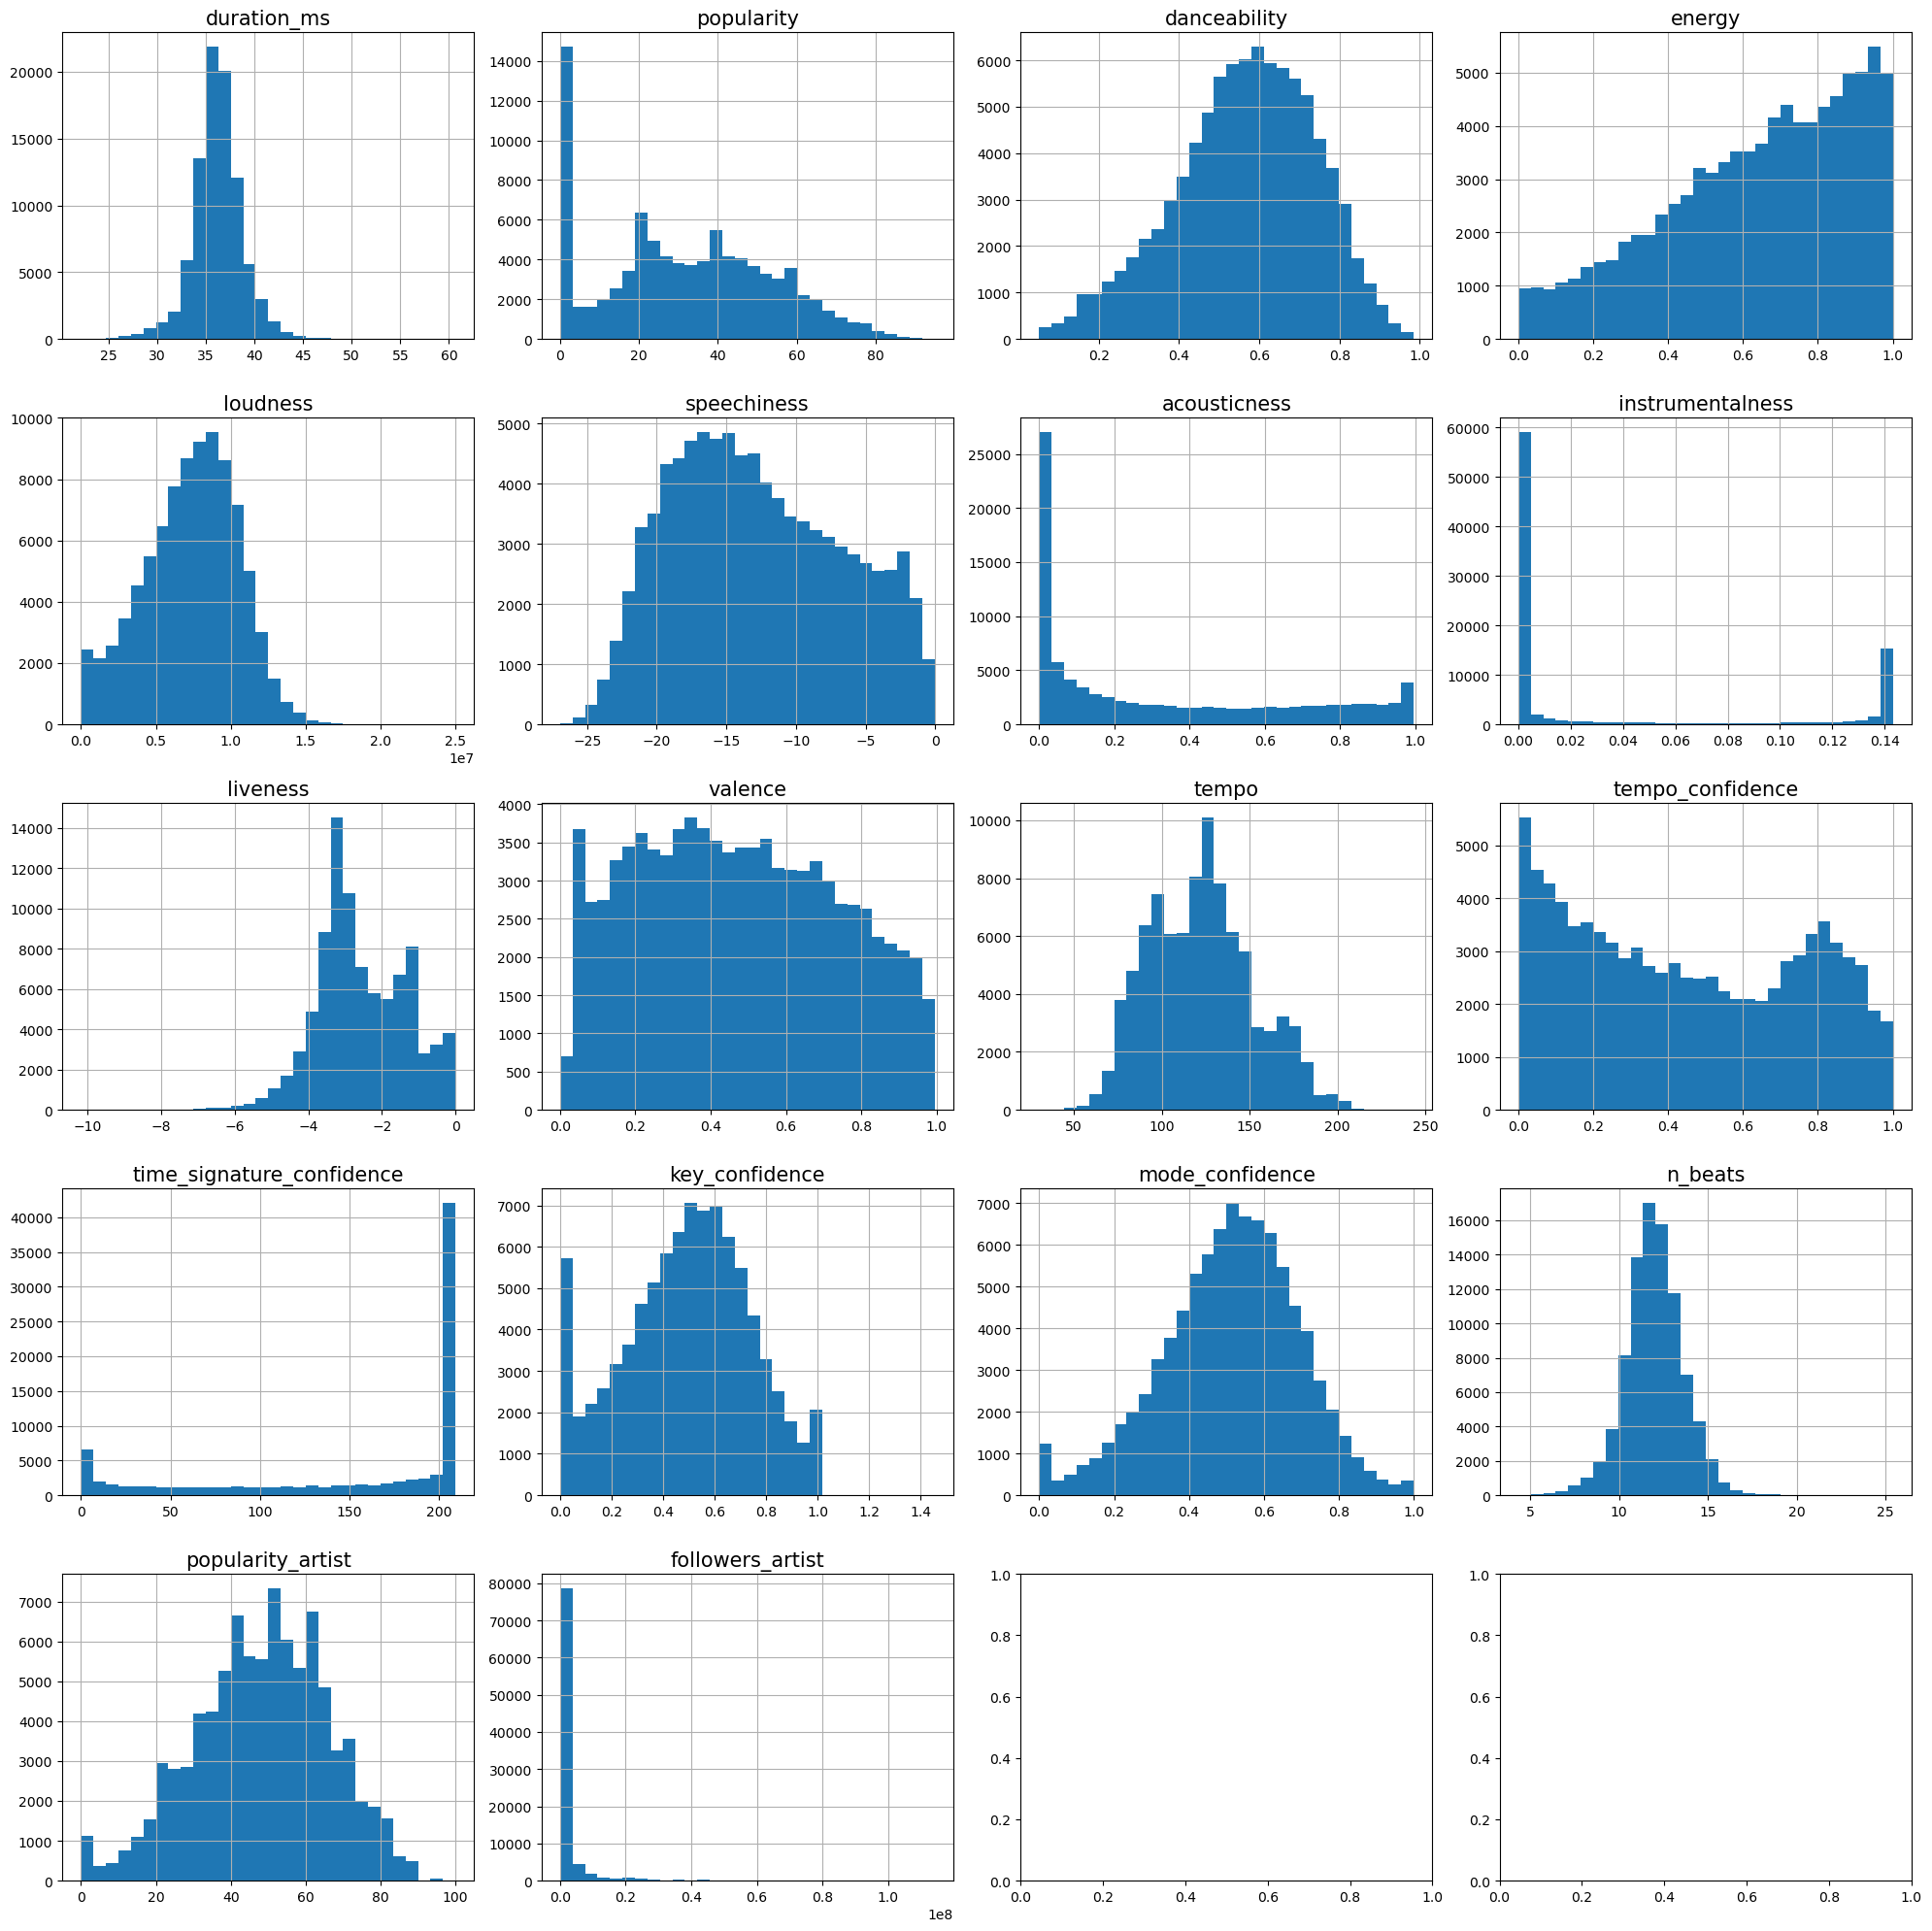

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

for i, var in enumerate(df_num.columns):
    row = i // 4
    col = i % 4
    df[var].hist(bins=30, ax=axes[row][col])
    axes[row][col].set_title(var, fontsize=15)
    
plt.tight_layout()
plt.show()

- trasformo, standardizzo e salvo

In [33]:
df.shape

(89068, 33)

In [34]:
to_drop = ['name', 'disc_number', 'track_number', 'artists', 'album_type', 'album_name',
           'album_release_date', 'album_release_date_precision', 'album_total_tracks']

df = df.drop(to_drop,axis=1)
df.shape

(89068, 24)

In [35]:
df.columns

Index(['duration_ms', 'explicit', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'genre', 'popularity_artist',
       'followers_artist', 'emotion'],
      dtype='object')

In [37]:
mean_popularity = df['popularity'].mean()
std_popularity = df['popularity'].std()

print(mean_popularity, std_popularity)

31.557641352674363 21.56702563123123


In [42]:
from sklearn.preprocessing import StandardScaler


num =['duration_ms', 'popularity', 'danceability', 'energy',
        'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'popularity_artist','followers_artist']



cat = ['explicit', 'key','mode','time_signature','genre', 'emotion' ]

columns_to_scale = df[num]
columns_to_keep = df[cat]

scaler = StandardScaler()

scaler.fit(columns_to_scale) 
train_scaled = scaler.transform(columns_to_scale)

# Concatenate the scaled columns and the columns to be kept
df = pd.concat([pd.DataFrame(train_scaled, columns= columns_to_scale.columns), columns_to_keep], axis=1)
df

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,0.947858,-0.186041,-0.472092,-0.588997,1.938632,0.659428,1.766613,-0.889812,-0.888017,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,minimal-techno,nervous
1,2.550119,0.623286,1.063136,-1.167680,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-1.246693,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,minimal-techno,bored
2,0.543118,0.345082,1.355375,0.007353,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.578946,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,minimal-techno,nervous
3,1.592682,-1.463244,0.633373,-0.369915,-1.010613,0.366106,-0.822027,1.836646,-0.443037,-1.657261,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,minimal-techno,nervous
4,0.385608,-1.463244,1.126168,0.133109,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-1.345901,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,minimal-techno,nervous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89063,-0.061779,-0.396795,-0.564232,1.355300,1.637100,0.608776,-0.940847,1.534564,1.111459,-0.388162,...,-1.805076,0.718447,1.320089,1.250663,1,5,0,4,edm,excited
89064,-0.110350,1.133327,0.581802,0.325672,0.936856,-1.645092,0.136492,-0.616040,-1.018318,-0.609472,...,0.134011,-0.458242,-0.067569,-0.300284,1,9,1,4,edm,nervous
89065,-0.235874,2.246143,1.424137,-0.039806,0.749566,-0.122951,-0.736753,-0.605343,-0.200804,1.256403,...,-0.992088,-0.027072,1.929533,1.725765,1,11,0,4,edm,pleased
89066,-0.073532,1.318797,0.507310,0.557535,1.449257,-0.592442,0.139463,-0.616016,-2.392504,-0.323295,...,0.513040,-0.340721,-0.320723,-0.301306,0,0,1,4,edm,excited


In [43]:
df.shape

(89068, 24)

In [44]:
df.to_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_final2.csv', index=False)


## prova di classification

In [110]:
df.columns

Index(['name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_beats', 'genre', 'popularity_artist', 'followers_artist', 'emotion'],
      dtype='object')

In [112]:
# Specifica le colonne da eliminare
colonne_da_elim = ['name', 'disc_number', 'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks',  'energy', 'valence', 'key_confidence']  #genre

# Elimina le colonne specificate
df_class = df.drop(columns = colonne_da_elim)
df_class.head()

,duration_ms,explicit,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,time_signature,tempo_confidence,time_signature_confidence,mode_confidence,n_beats,genre,popularity_artist,followers_artist,emotion
0,0.796429,False,0.950284,-0.177324,0,-0.578428,1,1.935748,0.649116,1.757947,...,2.144637,3,-1.409566,0.789977,0.079143,1.152839,minimal-techno,0.159957,0.035693,nervous
1,2.546684,False,0.625562,1.067112,5,-1.130350,0,-1.067661,-0.475235,1.808961,...,-0.076300,4,0.771900,-1.986216,0.430304,2.192708,minimal-techno,-0.064765,0.057477,bored
2,0.543190,False,0.347228,1.358241,7,-0.753520,0,1.003629,-0.883552,1.708860,...,-0.142405,3,1.332185,-1.927431,1.368565,0.439074,minimal-techno,-0.233306,-0.255735,nervous
3,1.589543,False,-1.461940,0.638980,6,-0.998953,0,0.365332,-0.826151,1.829365,...,0.225749,4,1.448221,-1.895274,-0.041569,1.533386,minimal-techno,-0.570389,-0.111898,nervous
4,0.386432,False,-1.461940,1.129904,11,-1.222844,0,-0.443884,0.548516,1.861365,...,-0.076738,4,1.448221,0.789977,-0.282993,0.338650,minimal-techno,-0.177126,0.080389,nervous


In [113]:
categoriche_da_trasformare = [ 'explicit', 'genre']

- One-Hot Encoding: Questo metodo crea nuove colonne binarie per ciascuna categoria presente nella variabile categorica. Queste nuove colonne rappresentano la presenza o l'assenza della categoria nelle osservazioni.
- Label Encoding: Questo metodo assegna a ciascuna categoria un valore numerico unico. È più adatto per variabili categoriche ordinate.

In [114]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Applica il LabelEncoder a ciascuna colonna categorica
label_encoder = LabelEncoder()
for col in categoriche_da_trasformare:
    df_class[col] = label_encoder.fit_transform(df_class[col])

df_class

,duration_ms,explicit,popularity,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,time_signature,tempo_confidence,time_signature_confidence,mode_confidence,n_beats,genre,popularity_artist,followers_artist,emotion
0,0.796429,0,0.950284,-0.177324,0,-0.578428,1,1.935748,0.649116,1.757947,...,2.144637,3,-1.409566,0.789977,0.079143,1.152839,73,0.159957,0.035693,nervous
1,2.546684,0,0.625562,1.067112,5,-1.130350,0,-1.067661,-0.475235,1.808961,...,-0.076300,4,0.771900,-1.986216,0.430304,2.192708,73,-0.064765,0.057477,bored
2,0.543190,0,0.347228,1.358241,7,-0.753520,0,1.003629,-0.883552,1.708860,...,-0.142405,3,1.332185,-1.927431,1.368565,0.439074,73,-0.233306,-0.255735,nervous
3,1.589543,0,-1.461940,0.638980,6,-0.998953,0,0.365332,-0.826151,1.829365,...,0.225749,4,1.448221,-1.895274,-0.041569,1.533386,73,-0.570389,-0.111898,nervous
4,0.386432,0,-1.461940,1.129904,11,-1.222844,0,-0.443884,0.548516,1.861365,...,-0.076738,4,1.448221,0.789977,-0.282993,0.338650,73,-0.177126,0.080389,nervous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90070,-0.058421,1,-0.394995,-0.554080,5,1.635926,0,0.607850,-0.944474,1.523328,...,1.739291,4,0.940980,0.789977,-1.802865,0.720500,30,1.321021,1.704072,excited
90071,-0.106681,1,1.135840,0.587604,9,0.940198,1,-1.645828,0.128364,-0.617950,...,-0.751012,4,0.884620,0.789977,0.134012,-0.450787,30,-0.064765,-0.539109,nervous
90072,-0.231369,1,2.249174,1.426742,11,0.754007,0,-0.123537,-0.741233,-0.607364,...,0.260114,4,1.222781,0.642070,-0.990804,-0.021945,30,1.929643,1.827149,pleased
90073,-0.070099,0,1.321396,0.513395,0,1.449353,1,-0.592969,0.131323,-0.617926,...,-0.478246,4,0.679072,0.789977,0.512608,-0.333942,30,-0.317577,-0.603217,excited


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df_class.loc[:, df_class.columns != 'emotion'].values
y = df_class['emotion'].values

# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((71929, 20), (17983, 20), (71929,), (17983,))

In [122]:
# Inizializza il classificatore Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il classificatore
rf_classifier.fit(X_train, y_train)

# Fai predizioni sul set di test
predictions = rf_classifier.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.5484068286715231


In [72]:
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.65      0.64      0.64      2049
       bored       0.57      0.46      0.51      1489
        calm       0.47      0.71      0.56      3819
     excited       0.51      0.54      0.53      2694
       happy       0.55      0.54      0.54      2380
     nervous       0.58      0.33      0.42      1432
    peaceful       0.76      0.22      0.34        87
     pleased       0.54      0.33      0.41      1775
     relaxed       0.60      0.25      0.35       633
         sad       0.72      0.82      0.77      1244
      sleepy       0.60      0.26      0.36       413

    accuracy                           0.55     18015
   macro avg       0.60      0.46      0.49     18015
weighted avg       0.56      0.55      0.53     18015

